In [1]:
using Pkg
pkg"activate ."
pkg"add JuMP"
pkg"add Cbc"
pkg"add Clp"
pkg"add Gurobi" # Precisa de licença
pkg"add Juniper"
pkg"add Ipopt"
pkg"add Plots"

 Activating environment at `~/Documents/streaming/notebooks/tutorials/jump/Project.toml`
   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Manifest.toml`
  [91d4177d] ↑ Opus_jll v1.3.1+0 ⇒ v1.3.1+1
  [f27f6e37] ↑ libvorbis_jll v1.3.6+2 ⇒ v1.3.6+3
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/jump/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorial

In [2]:
using Plots
gr()
plot(rand(3),rand(3))
nothing

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [3]:
using JuMP, Cbc, Clp, Gurobi, Juniper, Ipopt

## Começo

$$ \min c^T x \qquad \text{s. a} \quad Ax = b, \quad x \geq 0. $$

- Variáveis
- Função objetivo
- Restrições
- Expressões

$$ \max x_1 + 2x_2 \qquad \text{s. a} \quad x_1 + 3x_2 \leq 6, \quad 7x_1 + 5x_2 \leq 12, \quad x \geq 0. $$

In [7]:
using JuMP, Clp

model = Model(Clp.Optimizer)

@variable(model, x1 ≥ 0)
@variable(model, x2 ≥ 0)

@objective(model, Max, x1 + 2x2)

@constraint(model, x1 + 3x2 ≤ 6)
@constraint(model, 7x1 + 5x2 ≤ 12)

print(model)

optimize!(model)

Max x1 + 2 x2
Subject to
 x1 + 3 x2 ≤ 6.0
 7 x1 + 5 x2 ≤ 12.0
 x1 ≥ 0.0
 x2 ≥ 0.0
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 2.9999998 (2)
Clp0006I 2  Obj 4.125
Clp0000I Optimal - objective value 4.125
Clp0032I Optimal objective 4.125 - 2 iterations time 0.002


In [18]:
value(x1), value(x2), objective_value(model), termination_status(model), primal_status(model), dual_status(model)

(0.37500000000000006, 1.875, 4.125, MathOptInterface.OPTIMAL, MathOptInterface.FEASIBLE_POINT, MathOptInterface.FEASIBLE_POINT)

In [24]:
using JuMP, Clp

model = Model(Clp.Optimizer)

@variable(model, x[1:2] ≥ 0)

@objective(model, Max, x[1] + 2x[2])

@constraint(model, x[1] + 3x[2] ≤ 6)
@constraint(model, 7x[1] + 5x[2] ≤ 12)

print(model)

optimize!(model)

value.(x), objective_value(model), termination_status(model), primal_status(model), dual_status(model)

Max x[1] + 2 x[2]
Subject to
 x[1] + 3 x[2] ≤ 6.0
 7 x[1] + 5 x[2] ≤ 12.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 2.9999998 (2)
Clp0006I 2  Obj 4.125
Clp0000I Optimal - objective value 4.125
Clp0032I Optimal objective 4.125 - 2 iterations time 0.002


([0.37500000000000006, 1.875], 4.125, MathOptInterface.OPTIMAL, MathOptInterface.FEASIBLE_POINT, MathOptInterface.FEASIBLE_POINT)

## Exemplo 1

- Alice e Bob trabalham fazendo brincos, colares e pulseiras de miçangas e fio;
- Cada brinco, colar e pulseira gastam 8, 50 e 30 miçangas, resp.;
- Cara brinco, colar e pulseira usam 30cm, 120 cm e 70 cm de fio, resp.;
- Cada brinco, colar e pulseira gastam 2h30min, 5h30min e 3h15min, resp.;
- O custo do pacote com 100 miçangas é R\\$ 2;
- O custo do rolo de 1 metro de fio é R\\$ 4,5;
- Uma análise preliminar indica que eles conseguem vender um brinco por R\\$ 12, um colar a R\\$ 30 e uma pulseira a R\\$ 18;
- Cada um tem 40h de trabalho por semana;
- A quantidade de miçangas e fio atualmente disponíveis é 3 pacotes e 1,2 m.

**Modelo**

_Conjuntos_
- $P = \{\text{brinco}, \text{colar}, \text{pulseira}\}$: conjunto de produtos
- $M = \{\text{rolo de fio}, \text{pacote de miçanga}\}$: conjunto de materiais

_Parâmetros_
- $a_m$: custo do material $m \in M$;
- $T_{\max}$: tempo disponível;
- $v_p$: preço de venda do produto $p \in P$;
- $T_p$: quantidade de tempo para produzir o produto $p \in P$;
- $Q_m$: quantidade inicial do material $m \in M$;
- $U_{m,p}$: quantidade de material $m \in M$ utilizada pelo produto $p \in P$.

_Variáveis_
- $x_p$: quantidade do produto $p \in P$ vendida;
- $y_m$: quantidade do material $m \in M$ comprada.

$$\begin{aligned}
\max\qquad & \sum_p v_p x_p - \sum_m a_m y_m \\
\text{s. a} \qquad & \sum_p T_p x_p \leq T_{\max} \\
& \sum_p U_{m,p} x_p \leq Q_m + y_m, \qquad \forall m \in M \\
& x_p, y_m \geq 0.
\end{aligned}$$

In [29]:
using JuMP, Clp

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
v = [12; 30; 18]
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]

model = Model(Clp.Optimizer)

np = length(P)
nm = length(M)

@variable(model, x[1:np] ≥ 0)
@variable(model, y[1:nm] ≥ 0)

@objective(model, Max, sum(x[p] * v[p] for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum(x[p] * T[p] for p = 1:np) ≤ Tmax)

@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * x[p] for p = 1:np) ≤ Q[m] + y[m])

print(model)

optimize!(model)

Max 12 x[1] + 30 x[2] + 18 x[3] - 4.5 y[1] - 2 y[2]
Subject to
 lim_tempo : 2.5 x[1] + 5.5 x[2] + 3.25 x[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 1.2 x[2] + 0.7 x[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.5 x[2] + 0.3 x[3] - y[2] ≤ 3.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
Coin0506I Presolve 3 (0) rows, 5 (0) columns and 11 (0) elements
Clp0006I 0  Obj 0 Dual inf 48.499257 (3)
Clp0006I 4  Obj 362.16923
Clp0000I Optimal - objective value 362.16923
Clp0032I Optimal objective 362.1692308 - 4 iterations time 0.002


In [30]:
x, y = value.(x), value.(y)
for p = 1:np
    println("Produza $(x[p]) $(P[p])")
end
for m = 1:nm
    println("Compre $(y[m]) $(M[m])")
end

Produza 0.0 brinco
Produza 0.0 colar
Produza 24.615384615384617 pulseira
Compre 16.030769230769234 rolo de fio
Compre 4.384615384615384 pacote de miçanga


**Exemplo 1b**

In [32]:
using JuMP, Cbc

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
v = [12; 30; 18]
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]

model = Model(Cbc.Optimizer)

np = length(P)
nm = length(M)

@variable(model, x[1:np] ≥ 0, Int)
@variable(model, y[1:nm] ≥ 0, Int)

@objective(model, Max, sum(x[p] * v[p] for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum(x[p] * T[p] for p = 1:np) ≤ Tmax)

@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * x[p] for p = 1:np) ≤ Q[m] + y[m])

print(model)

optimize!(model)

Max 12 x[1] + 30 x[2] + 18 x[3] - 4.5 y[1] - 2 y[2]
Subject to
 lim_tempo : 2.5 x[1] + 5.5 x[2] + 3.25 x[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 1.2 x[2] + 0.7 x[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.5 x[2] + 0.3 x[3] - y[2] ≤ 3.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 x[1] integer
 x[2] integer
 x[3] integer
 y[1] integer
 y[2] integer
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 362.169 - 0.00 seconds
Cgl0003I 0 fixed, 2 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 3 rows, 5 columns (5 integer (0 of which binary)) and 11 elements
Cbc0012I Integer solution of -345.5 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 3 rows 5 columns, reduced to 0 rows 0 columns
Cbc0012I Integer solution of -350 found by RINS after 0 iterations and 0 nodes (0.00 secon

In [33]:
x, y = value.(x), value.(y)
for p = 1:np
    println("Produza $(x[p]) $(P[p])")
end
for m = 1:nm
    println("Compre $(y[m]) $(M[m])")
end

Produza 5.0 brinco
Produza 1.0 colar
Produza 19.0 pulseira
Compre 15.0 rolo de fio
Compre 4.0 pacote de miçanga


## Exemplo 2

- Tudo do exemplo 1b;
- A demanda do brinco, colar e pulseira no preço dado é 3, 4 e 12;
- Dando um desconto de 30%, o resto dos itens é vendido.

**Modelo**

Tudo de antes, mais

_Parâmetros_
- $D_p$: demanda pelo produto $p \in P$ com o preço original;

_Variáveis_
- $x_p$: modificado para ser a quantidade vendida até a demanda;
- $x_p^+$: quantidade do produto $p \in P$ vendida além da demanda;

$$\begin{aligned}
\max\qquad & \sum_p (v_p x_p + 0.7v_p x_p^+) - \sum_m a_m y_m \\
\text{s. a} \qquad & \sum_p T_p (x_p + x_p^+) \leq T_{\max} \\
& \sum_p U_{m,p} (x_p + x_p^+) \leq Q_m + y_m, \qquad \forall m \in M \\
& 0 \leq x_p \leq D_p, p \in P \\
& x_p^+, y_m \geq 0, \\
& x_p, x_p^+, y_m \quad \text{inteiros}.
\end{aligned}$$

In [37]:
using JuMP, Cbc

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
v = [12; 30; 18]
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]
D = [3, 4, 12]

model = Model(Cbc.Optimizer)

np = length(P)
nm = length(M)

@variable(model, 0 ≤ x[i=1:np] ≤ D[i], Int)
@variable(model, x⁺[1:np] ≥ 0, Int)
@variable(model, y[1:nm] ≥ 0, Int)

@objective(model, Max, sum(x[p] * v[p] + 0.7x⁺[p] * v[p] for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum((x[p] + x⁺[p]) * T[p] for p = 1:np) ≤ Tmax)

@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * (x[p] + x⁺[p]) for p = 1:np) ≤ Q[m] + y[m])

print(model)

optimize!(model)

Max 12 x[1] + 8.399999999999999 x⁺[1] + 30 x[2] + 21 x⁺[2] + 18 x[3] + 12.6 x⁺[3] - 4.5 y[1] - 2 y[2]
Subject to
 lim_tempo : 2.5 x[1] + 2.5 x⁺[1] + 5.5 x[2] + 5.5 x⁺[2] + 3.25 x[3] + 3.25 x⁺[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 0.3 x⁺[1] + 1.2 x[2] + 1.2 x⁺[2] + 0.7 x[3] + 0.7 x⁺[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.08 x⁺[1] + 0.5 x[2] + 0.5 x⁺[2] + 0.3 x[3] + 0.3 x⁺[3] - y[2] ≤ 3.0
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x⁺[1] ≥ 0.0
 x⁺[2] ≥ 0.0
 x⁺[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 x[1] ≤ 3.0
 x[2] ≤ 4.0
 x[3] ≤ 12.0
 x[1] integer
 x[2] integer
 x[3] integer
 x⁺[1] integer
 x⁺[2] integer
 x⁺[3] integer
 y[1] integer
 y[2] integer
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 339.964 - 0.00 seconds
Cgl0003I 0 fixed, 2 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 3 rows, 8 columns (8 integer (0 of which binary)) 

In [38]:
x, x⁺, y = value.(x), value.(x⁺), value.(y)
for p = 1:np
    println("Produza $(x[p] + x⁺[p]) $(P[p])")
end
for m = 1:nm
    println("Compre $(y[m]) $(M[m])")
end

Produza 5.0 brinco
Produza 4.0 colar
Produza 14.0 pulseira
Compre 15.0 rolo de fio
Compre 4.0 pacote de miçanga


# Exemplo 3

- Fábricas produzem e enviam para centros de distribuição;
- Centros distribuem para o revendedor;
- Centros fazem estoque;
- Demanda semanal prevista para 4 semanas;
- Fábricas têm limite de produção em tempo;
- Existe custo de transporte e de estoque.

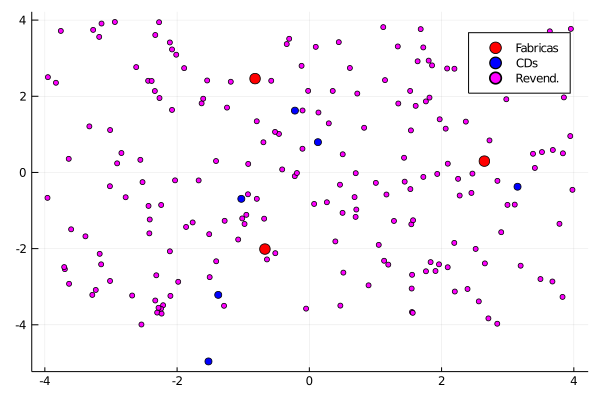

In [51]:
using Plots, Random
gr(size=(600,400))
Random.seed!(0)

nP = 4 * 3 # produtos
nT = 4 * 2 # horizonte
nF = 3 # fábricas
nCD = 6 # CDs
nR = 20 * 10 # Revendedores
Fxy = 3 * [cos.((1:nF) ./ nF * 2π) sin.((1:nF) ./ nF * 2π)] + randn(nF, 2)
CDxy = 2 * randn(nCD, 2)
Rxy = (2 * rand(nR, 2) .- 1) * 4

scatter(Fxy[:,1], Fxy[:,2], c=:red, ms=6, lab="Fabricas")
scatter!(CDxy[:,1], CDxy[:,2], c=:blue, ms=4, lab="CDs")
scatter!(Rxy[:,1], Rxy[:,2], c=:magenta, ms=3, lab="Revend.")

- $c^1_{i,j}$: custo de transporte da Fábrica $i$ para o CD $j$;
- $c^2_{j,k}$: custo de transporte do CD $j$ para o revendedor $k$;
- $E_j$: custo de estoque no CD $j$ por unidade de produto;
- $T_p$: tempo de produção do produto $p$;
- $L_i$: limite de tempo disponível na fábrica $i$;
- $D_{k,t,p}$: demanda do produto $p$ no revendedor $k$ na semana $t$;

- $x_{i,j,t,p}$: quantidade enviada do produto $p$ da fábrica $i$ para o CD $j$ na semana $t$;
- $y_{j,k,t,p}$: quantidade enviada do produto $p$ do CD $j$ para o revendedor $k$ na semana $t$;
- $z_{j,t,p}$: quantidade armazenada do produto $p$ no CD $j$ da semana $t$ para a $t+1$.

$$\begin{aligned}
\min \qquad & \sum_{i,j,t,p} c^1_{i,j} x_{i,j,t,p} + \sum_{j,k,t,p} c^2_{j,k} y_{j,k,t,p}
+ \sum_{j,t,p} E_j z_{j,t,p} \\
\text{suj. a} \qquad & \sum_{j,p} T_p x_{i,j,t,p} \leq L_i, \qquad \forall i, t \\
& z_{j,0,p} = 0, \qquad \forall t, p \\
& \sum_i x_{i,j,t,p} + z_{j,t-1,p} = \sum_k y_{j,k,t,p} + z_{j,t,p}, \qquad \forall j, t, p \\
& \sum_j y_{j,k,t,p} \geq D_{k,t,p} \qquad \forall k, t, p
\end{aligned}$$

In [52]:
using LinearAlgebra
Random.seed!(0)

# Criando dados falsos
c1 = [norm(Fxy[i,:] - CDxy[j,:]) for i = 1:nF, j = 1:nCD]
c2 = [norm(CDxy[j,:] - Rxy[k,:]) for j = 1:nCD, k = 1:nR]
E = rand(10:20, nCD)
T = rand(1:20, nP) / 60
L = rand(10:20, nF) * nR * nP
D = rand(10:15, nR, nT, nP);

In [57]:
using JuMP, Cbc, Gurobi

#model = Model(optimizer_with_attributes(Cbc.Optimizer, "seconds" => 10.0))
model = Model(Gurobi.Optimizer)

@variable(model, x[i=1:nF, j=1:nCD, t=1:nT, p=1:nP] ≥ 0, Int)
@variable(model, y[j=1:nCD, k=1:nR, t=1:nT, p=1:nP] ≥ 0, Int)
@variable(model, z[j=1:nCD, t=0:nT, p=1:nP] ≥ 0, Int)

fix.(z[:,0,:], 0.0, force=true)

@objective(model, Min,
           sum(x[i,j,t,p] * c1[i,j] for i=1:nF, j=1:nCD, t=1:nT, p=1:nP) +
           sum(y[j,k,t,p] * c2[j,k] for j=1:nCD, k=1:nR, t=1:nT, p=1:nP) +
           sum(z[j,t,p] * E[j] for j=1:nCD, t=1:nT, p=1:nP))

@constraint(model, lim_tempo[i=1:nF,t=1:nT],
            sum(T[p] * x[i,j,t,p] for j=1:nCD, p=1:nP) ≤ L[i])
@constraint(model, balanco[j=1:nCD,t=1:nT,p=1:nP],
            sum(x[i,j,t,p] for i = 1:nF) + z[j,t-1,p] ==
            sum(y[j,k,t,p] for k = 1:nR) + z[j,t,p])
@constraint(model, demanda[k=1:nR,t=1:nT,p=1:nP],
            sum(y[j,k,t,p] for j = 1:nCD) ≥ D[k,t,p])

optimize!(model)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (linux64)
Optimize a model with 19800 rows, 117576 columns and 235008 nonzeros
Model fingerprint: 0x1c204eb1
Variable types: 0 continuous, 117576 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-02, 1e+00]
  Objective range  [1e-01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+04]
Found heuristic solution: objective 1774120.6720
Presolve removed 0 rows and 108 columns
Presolve time: 0.48s
Presolved: 19800 rows, 117468 columns, 234900 nonzeros
Variable types: 0 continuous, 117468 integer (0 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.05s

Solved with dual simplex

Root relaxation: objective 7.005903e+05, 23205 iterations, 0.57 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  

In [55]:
length(all_variables(model))

117576

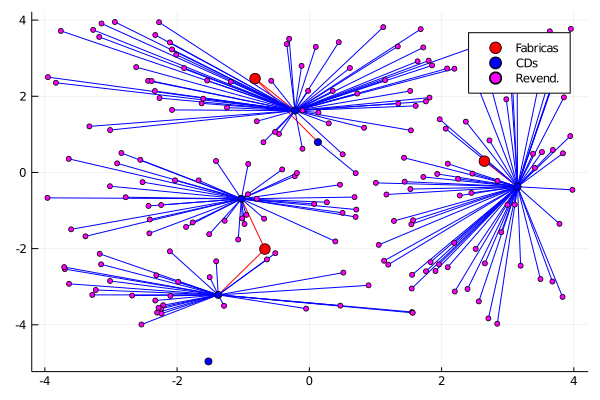

In [58]:
function figura(x, y, z)
    x = round.(Int, value.(x))
    y = round.(Int, value.(y))
    z = round.(Int, value.(z))

    plot()
    t = 1
    for i = 1:nF, j = 1:nCD
        if any(x[i,j,t,:] .> 0)
            plot!([Fxy[i,1], CDxy[j,1]], [Fxy[i,2], CDxy[j,2]], c=:red, lab="")
        end
    end
    for j = 1:nCD, k = 1:nR
        if any(y[j,k,t,:] .> 0)
            plot!([CDxy[j,1], Rxy[k,1]], [CDxy[j,2], Rxy[k,2]], c=:blue, lab="")
        end
    end
    scatter!(Fxy[:,1], Fxy[:,2], c=:red, ms=6, lab="Fabricas")
    scatter!(CDxy[:,1], CDxy[:,2], c=:blue, ms=4, lab="CDs")
    scatter!(Rxy[:,1], Rxy[:,2], c=:magenta, ms=3, lab="Revend.")
end

figura(x, y, z)

## Exemplo 4

Regressão Logística

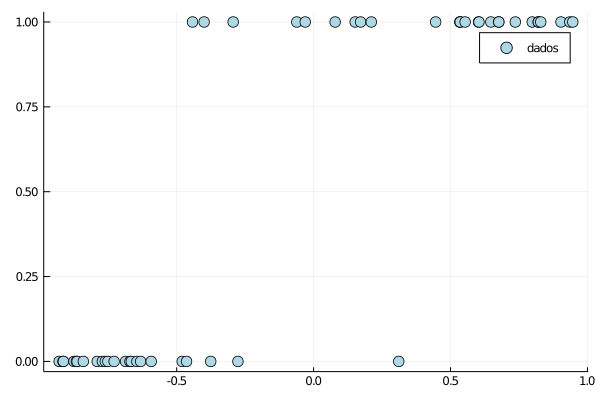

In [59]:
using Plots, Random
gr(size=(600,400))

Random.seed!(0)
n = 50
x = sort(rand(n) * 2 .- 1)
y = [xi + 0.2 + randn() * 0.25 > 0 ? 1 : 0 for xi in x]

scatter(x, y, m=(:lightblue, 6), lab="dados")

$$ h(x; \beta) = \sigma(\beta_0 + \beta_1 x) = \frac{1}{1 + e^{-\beta_0 - \beta_1 x}} $$

$$ \max \ell(\beta) = \sum_i y_i \ln h(x_i, \beta) + (1 - y_i) \ln \big(1 - h(x_i,\beta)\big) $$

In [64]:
using JuMP, Ipopt

model = Model(Ipopt.Optimizer)

@variable(model, β[0:1])

@NLexpression(model, hi[i=1:n], 1 / (1 + exp(-β[0] - β[1] * x[i])))
@NLobjective(model, Max,
             sum(y[i] * log(hi[i]) + (1 - y[i]) * log(1 - hi[i]) for i = 1:n) )

optimize!(model)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

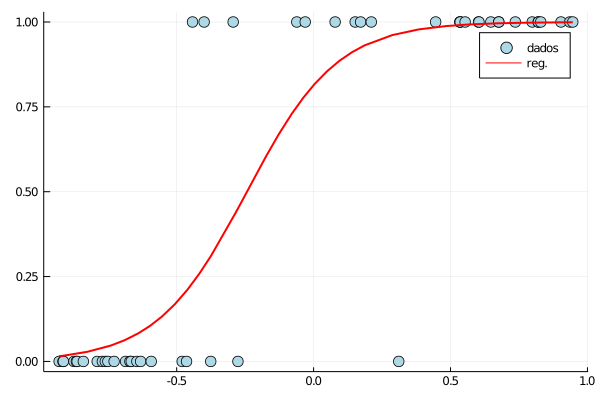

In [62]:
function figura_reglog(β)
    β = value.(β)

    scatter(x, y, m=(:lightblue, 6), lab="dados")
    plot!(x -> 1 / (1 + exp(-β[0] - β[1] * x)), extrema(x)..., c=:red, lw=2, lab="reg.")
end

figura_reglog(β)

## Exemplo 5

- Tudo do exemplo 1b:
- Alice e Bob trabalham fazendo brincos, colares e pulseiras de miçangas;
- Cada brinco, colar e pulseira gastam 8, 50 e 30 miçangas, resp.;
- Cara brinco, colar e pulseira usam 30cm, 120 cm e 70 cm de fio, resp.;
- Cada brinco, colar e pulseira gastam 2h30min, 5h30min e 3h15min, resp.;
- O custo do pacote com 100 miçangas é R\\$ 2;
- O custo do rolo de 1 metro de fio é R\\$ 4,5;
- Uma análise priliminar indica que eles conseguem vender um brinco por R\\$ 12, um colar a R\\$ 30 e uma pulseira a R\\$ 18;
- Cada um tem 40h de trabalho por semana;
- A quantidade de miçangas e fio atualmente disponíveis é 3 pacotes e 1,2 m.

- Além disso, a demanda depende linearmente do valor do item, i.e., $d_p = \alpha_p + \beta_p v_p$, onde
    - $\alpha = 11, 6.25,$ e $28.5$ e $\beta = -0.7, -0.075$, e $-0.91$ para brinco, colar e pulseira, resp.

**Modelo**

_Conjuntos_
- $P = \{\text{brinco}, \text{colar}, \text{pulseira}\}$: conjunto de produtos
- $M = \{\text{rolo de fio}, \text{pacote de miçanga}\}$: conjunto de materiais

_Parâmetros_
- $a_m$: custo do material $m \in M$;
- $T_{\max}$: tempo disponível;
- $T_p$: quantidade de tempo para produzir o produto $p \in P$;
- $Q_m$: quantidade inicial do material $m \in M$;
- $U_{m,p}$: quantidade de material $m \in M$ utilizada pelo produto $p \in P$;
- $\alpha_p$ e $\beta_p$, tais que $d_p = \alpha_p + \beta_p v_p$ é a demanda do produto $p \in P$.

_Variáveis_
- $x_p$: quantidade do produto $p \in P$ vendida;
- $v_p$: valor de venda do produto $p \in P$;
- $y_m$: quantidade do material $m \in M$ comprada.

_Expressão_
- $d_p = \alpha_p + \beta_p v_p$.

$$\begin{aligned}
\max\qquad & \sum_p v_p x_p - \sum_m a_m y_m \\
\text{s. a} \qquad & \sum_p T_p x_p \leq T_{\max} \\
& \sum_p U_{m,p} x_p \leq Q_m + y_m, \qquad \forall m \in M \\
& x_p \leq d_p = \alpha_p + \beta_p v_p, \qquad \forall p \in P \\
& d_p \geq 0 \\
& x_p, y_m, v_p \geq 0.
\end{aligned}$$

In [21]:
using JuMP, Gurobi, Juniper, Ipopt

P = ["brinco", "colar", "pulseira"]
M = ["rolo de fio", "pacote de miçanga"]

a = [4.5; 2]
Tmax = 2 * 40
T = [2.5; 5.5; 3.25]
Q = [1.2; 3]
U = [0.3   1.2  0.7;
     0.08  0.5  0.3]
α = [11; 6.25; 28.5]
β = [-0.7; -0.075; -0.91]

#model = Model(optimizer_with_attributes(Gurobi.Optimizer, "NonConvex" => 2))
optimizer = Juniper.Optimizer
nl_solver = optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 0)
model = Model(optimizer_with_attributes(optimizer, "nl_solver" => nl_solver))

np = length(P)
nm = length(M)

@variable(model, x[1:np] ≥ 0, Int)
@variable(model, y[1:nm] ≥ 0, Int)
@variable(model, v[1:np] ≥ 0, Int)

@expression(model, d[p=1:np], α[p] + β[p] * v[p] / 100)

@objective(model, Max, sum(x[p] * v[p] / 100 for p = 1:np) - sum(y[m] * a[m] for m = 1:nm))

@constraint(model, lim_tempo, sum(x[p] * T[p] for p = 1:np) ≤ Tmax)
@constraint(model, lim_material[m = 1:nm], sum(U[m,p] * x[p] for p = 1:np) ≤ Q[m] + y[m])
@constraint(model, demanda_naonegativa[p=1:np], d[p] ≥ 0)
@constraint(model, demanda[p=1:np], x[p] ≤ d[p])

print(model)

optimize!(model)

Max 0.01 x[1]*v[1] + 0.01 x[2]*v[2] + 0.01 x[3]*v[3] - 4.5 y[1] - 2 y[2]
Subject to
 demanda_naonegativa[1] : -0.006999999999999999 v[1] ≥ -11.0
 demanda_naonegativa[2] : -0.00075 v[2] ≥ -6.25
 demanda_naonegativa[3] : -0.0091 v[3] ≥ -28.5
 lim_tempo : 2.5 x[1] + 5.5 x[2] + 3.25 x[3] ≤ 80.0
 lim_material[1] : 0.3 x[1] + 1.2 x[2] + 0.7 x[3] - y[1] ≤ 1.2
 lim_material[2] : 0.08 x[1] + 0.5 x[2] + 0.3 x[3] - y[2] ≤ 3.0
 demanda[1] : x[1] + 0.006999999999999999 v[1] ≤ 11.0
 demanda[2] : x[2] + 0.00075 v[2] ≤ 6.25
 demanda[3] : x[3] + 0.0091 v[3] ≤ 28.5
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 y[1] ≥ 0.0
 y[2] ≥ 0.0
 v[1] ≥ 0.0
 v[2] ≥ 0.0
 v[3] ≥ 0.0
 x[1] integer
 x[2] integer
 x[3] integer
 y[1] integer
 y[2] integer
 v[1] integer
 v[2] integer
 v[3] integer
nl_solver         : MathOptInterface.OptimizerWithAttributes(Ipopt.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute,Any}[MathOptInterface.RawParameter("print_level") => 0])
feasibility_pump  : false
log_levels        : [:Option

┌ Info: no explicit NLP constraints or objective provided using @NLconstraint or @NLobjective macros
└ @ Juniper /home/abel/.julia/packages/Juniper/Hm6I1/src/MOI_wrapper/MOI_wrapper.jl:346



    5       4                0.0                        330.59            Inf%    0.1       -      11486.8% 
    6       5                0.0                        330.59            Inf%    0.1       -      1305.0%  
    7       5                0.0                        330.59            Inf%    0.1       -      1889.9%  
    8       6                0.0                        330.36            Inf%    0.1       -       59.7%   
    8       7                0.0                        330.19            Inf%    0.2       -       19.3%   
    9       5                0.0                        330.16            Inf%    0.2       -       71.9%   
    9       5                0.0                        330.13            Inf%    0.2       -        4.7%   
   10       6                0.0                        329.82            Inf%    0.2       -       83.7%   
   11       8                0.0                        329.79            Inf%    0.2       -       57.6%   
   12       9     

In [22]:
function imprime(x, y, v)
    x, y, v = round.(Int, value.(x)), round.(Int, value.(y)), round.(Int, value.(v)) / 100
    d = round.(Int, α + β .* v)
    for p = 1:np
        println("Produza $(x[p]) $(P[p]) a preço $(v[p]). Demanda $(d[p])")
    end
    for m = 1:nm
        println("Compre $(y[m]) $(M[m])")
    end
end

imprime(x, y, v)

Produza 5 brinco a preço 8.57. Demanda 5
Produza 3 colar a preço 43.33. Demanda 3
Produza 13 pulseira a preço 17.03. Demanda 13
Compre 13 rolo de fio
Compre 3 pacote de miçanga
